How to animate 2D fields
====================

In this post, we will be discussing how to animate a 2D field with Python

In this case we're animating the surface temperature from a dataset provided by the xarray tutorial.

First, we're loading some python modules

In [1]:
# Numpy and xarray are always necessary
import numpy as np
import xarray as xr

# pyplot needed to plot the dataset, but animation only needed much further down.
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

# Also, in case we haven't created it yet, make sure that we have a directory for images and videos
! test -d ../images/Python_Animation && rm -rf ../images/Python_Animation/* || mkdir -p ../images/Python_Animation

In this case, we'll be using the North-American Air Temperature data provided by xarray in the github directory https://github.com/pydata/xarray-data

In [2]:
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

We open the dataset and select the temperature field, change it to Celsius, and give it a shorter "long name".

In [3]:
tas=ds.air
tas = tas - 273.15
tas.attrs['units'] = 'degC'
tas.attrs['long_name'] = "Air Temperature"

Any animation is practically a succession of frames, or still images. What we have to do is generate all frames independently and then stitch them together.

But for a start, we're first looking at the initial images to see what we get:

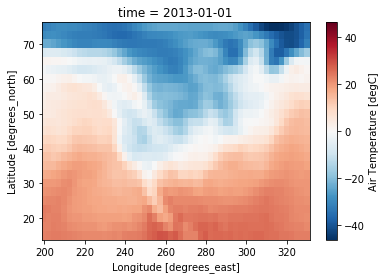

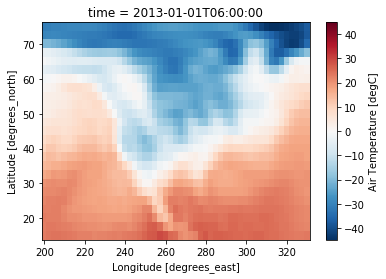

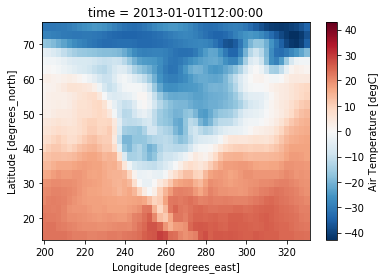

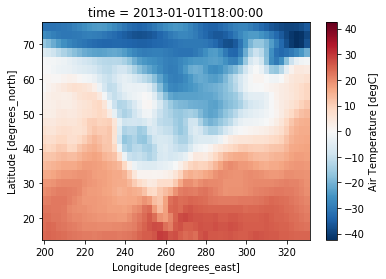

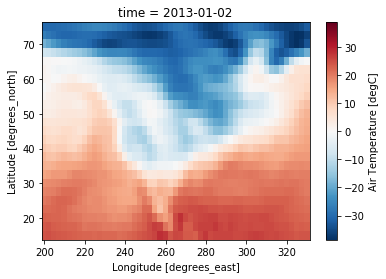

In [4]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

The first thing we notice is the title. At each frame for midnight, it shows only the date, but any other time, it also adds the hours, minutes, and seconds. This makes the title quite jittery, and will not look good in the animation. We need to set the title manually.

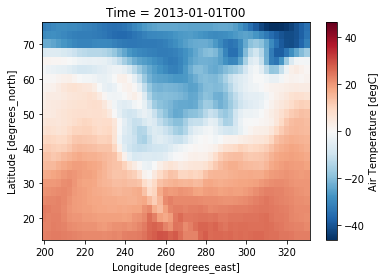

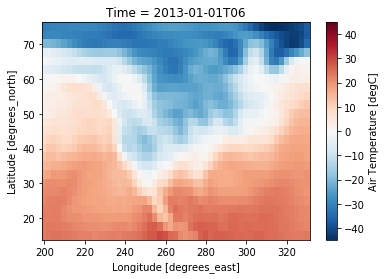

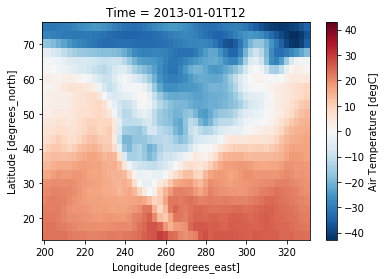

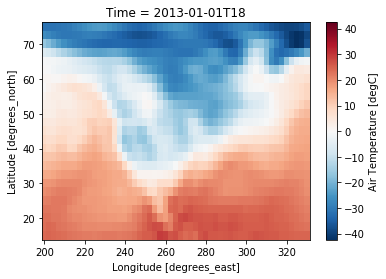

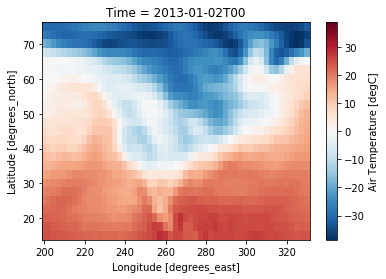

In [5]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.show()
    plt.close()

Now that we have a constant width title, and everything else seems fine, we can start working on the animation.

## Animated Gif
If we want to create an animated Gif, we'll start by creating the frames and save them to PNG files independently.

In [6]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6)      # We'll make it a bit bigger
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"../images/Python_Animation/Python_Animation_01_frame_{i:04}.png")
    plt.close()

In the `savefig` command, we're using an "f-string", that is a litteral f followed by a string. This means that inside the string, any braces will indicate where it should replace something.

In this case, `{i:04}` means replace this with the value of `i`, zero-padded on the left to 4 digits.

We can see the files with the `ls` command:

In [7]:
!ls ../images/Python_Animation/

Python_Animation_01_frame_0000.png  Python_Animation_01_frame_0020.png
Python_Animation_01_frame_0001.png  Python_Animation_01_frame_0021.png
Python_Animation_01_frame_0002.png  Python_Animation_01_frame_0022.png
Python_Animation_01_frame_0003.png  Python_Animation_01_frame_0023.png
Python_Animation_01_frame_0004.png  Python_Animation_01_frame_0024.png
Python_Animation_01_frame_0005.png  Python_Animation_01_frame_0025.png
Python_Animation_01_frame_0006.png  Python_Animation_01_frame_0026.png
Python_Animation_01_frame_0007.png  Python_Animation_01_frame_0027.png
Python_Animation_01_frame_0008.png  Python_Animation_01_frame_0028.png
Python_Animation_01_frame_0009.png  Python_Animation_01_frame_0029.png
Python_Animation_01_frame_0010.png  Python_Animation_01_frame_0030.png
Python_Animation_01_frame_0011.png  Python_Animation_01_frame_0031.png
Python_Animation_01_frame_0012.png  Python_Animation_01_frame_0032.png
Python_Animation_01_frame_0013.png  Python_Animation_01_frame_0033.png
Python

The easiest way to convert this to an animated gif is to use the command line tool `convert`, which is part of "ImageMagick":

In [8]:
!convert ../images/Python_Animation/Python_Animation_01_frame*png ../images/Python_Animation/Python_Animation_01.gif
display(HTML("<img src='../images/Python_Animation/Python_Animation_01.gif' />"))

The `display(HTML())` part includes the image as part of the output of the cell. Unfortunately this also means that the image will probably be cached by the browser, so don't be too surprised if it doesn't seem to change even if you make changes to the code. 

Because we're going one directory up, jupyter notebook needs to be started at least one directory up from where this Notebook is actually located, otherwise it won't find the image file.

In the following, we will be using higher numbers in the file names to distinguish between animations. 

In the above animation, we see that the colorbar at the side is flickering widely. The ticks are always going from -40 to 40, but they are not stationary at all. So let's fix them.

In [9]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-40, vmax=40  # Minimum and Maximum values
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"../images/Python_Animation/Python_Animation_02_frame_{i:04}.png")
    plt.close()

In [10]:
!convert ../images/Python_Animation/Python_Animation_02_frame*.png ../images/Python_Animation/Python_Animation_02.gif
display(HTML("<img src='../images/Python_Animation/Python_Animation_02.gif' />"))

Now we see that two things have changed. One is the colormap. We liked the old one better, so we need to change that. Also, in some frames, the minimum temperature in some places is below -40 degrees Celsius, which causes the colorbar to get an arrow end pointing down, which causes flickering.

Now we could change the minimum value, but for this example, I'll be using the `kwargs` to disable these arrows.

In [11]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-40, vmax=40,
        cmap='coolwarm',    # Change the colormap back to 'bwr'
        cbar_kwargs={
            'extend':'neither' # Don't extend the colorbar in either direction. Other possibilities
                               # would be 'both', 'min', or 'max'
        }
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"../images/Python_Animation/Python_Animation_03_frame_{i:04}.png")
    plt.close()

In [12]:
!convert ../images/Python_Animation/Python_Animation_03_frame*.png ../images/Python_Animation/Python_Animation_03.gif
display(HTML("<img src='../images/Python_Animation/Python_Animation_03.gif' />"))

And this is a perfectly good animated gif to use in any presentation or website.
## Animation within Python
This is where the `animation` import from the beginning comes in.

The animation is trickier, because we need to interact with the module, the figures, even the axes explicitly, but it's also a lot shorter to write, as we only update the data, not the whole figure.

This is still a bit confusing even to me, but it seems as if this part doesn't work if we don't execute all the code in a single cell.

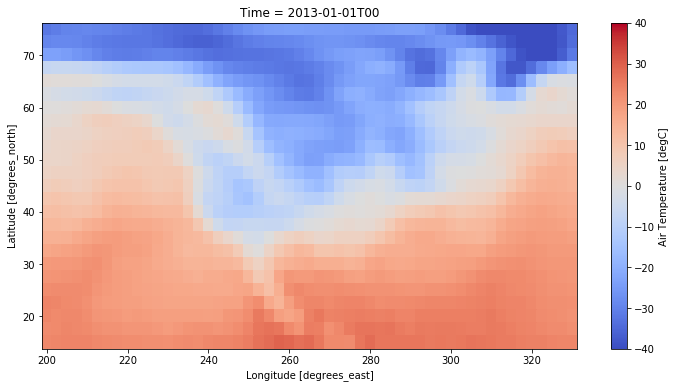

In [13]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = tas[0,:,:].plot(
    add_colorbar=True,
    cmap='coolwarm',
    vmin=-40, vmax=40,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=40,       # Could also be iterable or list
    interval=200     # ms between frames
)

Now that we have the animation object, we can either display it as a JavaScript App:

In [14]:
HTML(ani.to_jshtml())

Or we can save it as, for example, an mp4:

In [15]:
ani.save('../images/Python_Animation/Python_Animation_04.mp4')
display(HTML("<video controls><source src='../images/Python_Animation/Python_Animation_04.mp4' type='video/mp4'></video>"))

This is only a very simplistic method of using the `matplotlib.animate` functionality. Christopher Bull has created program to convert NetCDF files into animations directly. Have a look at [MkMOV](http://christopherbull.com.au/mkmov/) if you want to find out more.